In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ipl_df = pd.read_csv("IPL_data.csv")
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [4]:
X_features = ['AGE','COUNTRY','PLAYING ROLE','T-RUNS','T-WKTS','ODI-RUNS-S','ODI-SR-B','ODI-WKTS',
             'ODI-SR-BL','CAPTAINCY EXP','RUNS-S','HS','AVE','SR-B',
             'SIXERS','RUNS-C','WKTS','AVE-BL','ECON','SR-BL']

In [10]:
categorical_features = ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']
ipl_auction_encoded_df = pd.get_dummies(ipl_df[X_features],columns = categorical_features,drop_first = True)

In [12]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [13]:
X = ipl_auction_encoded_df
Y = ipl_df['SOLD PRICE']

In [14]:
#standardization f X & Y 
# Standardization is the process of bringing all features or variables into one single scale (normalized  
# scale). This can be done by subtracting mean from the values and dividing by the standard devia
# tion of the feature or variable. 

In [17]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
Y = ((Y- Y.mean())/Y.std())

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled ,Y, test_size = 0.2,random_state = 42)

In [20]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [21]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

In [24]:
columns_coef_df = pd.DataFrame({'columns': ipl_auction_encoded_df.columns, 'coef':linreg.coef_})
columns_coef_df

,columns,coef
0,T-RUNS,-0.435396
1,T-WKTS,-0.046326
2,ODI-RUNS-S,0.508409
3,ODI-SR-B,-0.033240
4,ODI-WKTS,0.222038
5,ODI-SR-BL,-0.050657
6,RUNS-S,0.172827
7,HS,-0.491733
8,AVE,0.585714
9,SR-B,-0.116548


In [25]:
#sorting the coeffcients
sorted_coef_vals = columns_coef_df.sort_values('coef',ascending = False)

Text(0, 0.5, 'Features')

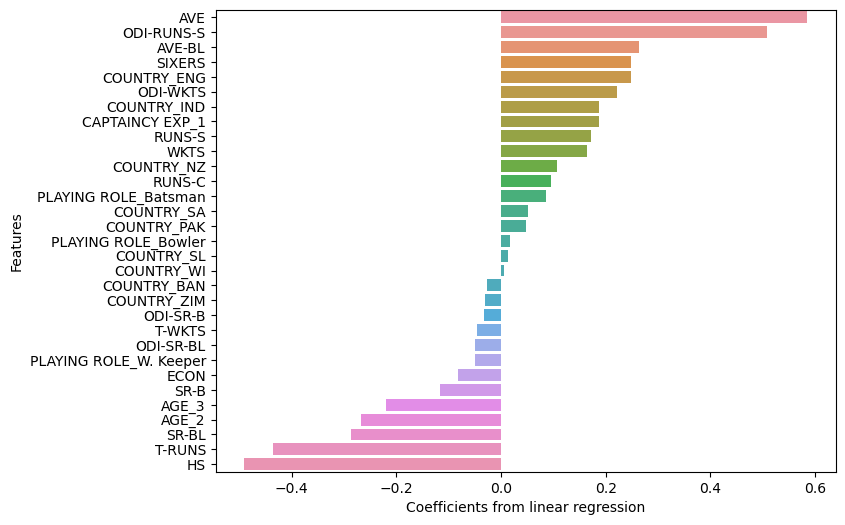

In [27]:
import seaborn as sn
plt.figure(figsize = (8,6))
sn.barplot(x = 'coef',y = 'columns', data = sorted_coef_vals);
plt.xlabel("Coefficients from linear regression")
plt.ylabel("Features")

In [32]:
#calculate the RMSE on training and test
from sklearn import metrics
def get_train_test_rmse(model):
    y_train_pred = model.predict(X_train)
    rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),3)
    y_test_pred = model.predict(X_test)
    rmse_test = round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),3)
    print('train:',rmse_train,'test:',rmse_test)

In [34]:
get_train_test_rmse(linreg)
#for good mdel needs to have similar error

train: 0.679 test: 0.749


## Regularization

In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 1,max_iter = 500)
ridge.fit(X_train,y_train)

Ridge(alpha=1, max_iter=500)

In [36]:
get_train_test_rmse(ridge)

train: 0.68 test: 0.724


In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01,max_iter = 500)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=500)

In [38]:
get_train_test_rmse(lasso)
# LASSO reduces some of the coefficient values to 0, which indicates that these features are 
# not necessary for explaining the variance in the outcome variable.

train: 0.688 test: 0.698


In [40]:
lasso_coef_df = pd.DataFrame({'columns':ipl_auction_encoded_df.columns,
                              'coef':lasso.coef_})

In [41]:
lasso_coef_df[lasso_coef_df.coef == 0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0
